<a href="https://colab.research.google.com/github/khbae/data-analytics-process/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4%EC%9D%98_%EC%9D%B4%ED%95%B4%EC%99%80_%EB%A6%AC%EB%8D%94%EC%9D%98_%EC%97%AD%ED%95%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석 프로세스의 이해와 리더의 역할

## [배경훈 (성균관대학교)](https://biz.skku.edu/bizskk/intro/faculty.do?mode=view&perId=LZStrK4YQ4gQgZgFgggGTAUQIwAYBSBHAngFhhgFliAjAcwF4qg%20&srProfessorType=20)



# Big Data or Large Data

![](https://github.com/data-science-lab/predicting-oil-prices/blob/main/03_Result/data2.png?raw=true)

# 데이터 분석 프로세스

![](https://github.com/data-science-lab/predicting-oil-prices/blob/main/03_Result/process3.png?raw=true)

![](https://github.com/data-science-lab/predicting-oil-prices/blob/main/03_Result/process4.png?raw=true)

# 데이터 분석 실습 - 오일 가격 예측 모델

## Input, Output 데이터를 활용해서 unknown인 함수 f 를 찾는 과정

![](https://github.com/data-science-lab/predicting-oil-prices/blob/main/03_Result/function2.png?raw=true)

## 선형함수: Small Data, Low-Performance Computing

## 비선형함수: Large Data, High-Performance Computing

# 훈련(Training)과 검증(Testing)

![](https://github.com/data-science-lab/predicting-oil-prices/blob/main/03_Result/training_test.png?raw=true)

# 선형 회귀 (Linear Regression)

\begin{gather*}  y_{i} = \beta_{i}x_{i1} + \cdots + \beta_{p}x_{ip} + \epsilon_{i} = x_{i}^T\beta + \epsilon_{i} , \hspace{2cm} i = 1, ..., n  \end{gather*}

![](https://github.com/data-science-lab/predicting-oil-prices/blob/main/03_Result/regression.png?raw=true)


[Simple Regression 예시](https://gallery.shinyapps.io/simple_regression/)

# 데이터와 작업 환경 세팅

## 라이브러리 설치

In [48]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install sklearn
!pip3 install tensorflow

## 필요한 라이브러리를 불러오기(Import)

In [49]:
# 데이터 전처리에 사용하는 라이브러리
import numpy as np
import pandas as pd

# 데이터를 시각적으로 표현하는데 사용하는 라이브러리
import matplotlib.pyplot as plt

# 선형회귀분석에 사용하는 머신러닝 라이브러리
from sklearn.linear_model import LinearRegression

# 서포트 벡터 머신에 사용되는 머신러닝 라이브러리
from sklearn import svm

# 결정 트리 모형에 사용되는 머신러닝 라이브러리
from sklearn.tree import DecisionTreeRegressor

# 뉴럴 네트워크에 사용되는 라이브러리
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

## Dataset 

### Crude Oil Brent 가격 : 1987년 5월 20일	 ~ 2019년 12월 31일
### 3개월 Treasury Bill: Secondary Market Rate : 1987년 5월 20일	 ~ 2019년 12월 31일

In [50]:
# 깃허브에서 저장되어있는 데이터 불러오기
url = 'https://raw.githubusercontent.com/data-science-lab/predicting-oil-prices/main/01_Data/data.csv'
dataset = pd.read_csv(url, index_col="Date", parse_dates=["Date"])
dataset.head()

,Oil_price,DTB3_rate
Date,,
1987-05-20,18.63,0.0569
1987-05-21,18.45,0.0553
1987-05-22,18.55,0.0555
1987-05-25,18.60,0.0555
1987-05-26,18.63,0.0561


In [51]:
## 로그 수익률 계산
log_return = np.log(dataset['Oil_price'])
log_return = log_return.diff(1)
dataset['Oil_log_return'] = log_return
dataset = dataset[["Oil_price", "Oil_log_return", "DTB3_rate"]]  ## 열의 순서를 재배치
dataset.head()

,Oil_price,Oil_log_return,DTB3_rate
Date,,,
1987-05-20,18.63,NaN,0.0569
1987-05-21,18.45,-0.009709,0.0553
1987-05-22,18.55,0.005405,0.0555
1987-05-25,18.60,0.002692,0.0555
1987-05-26,18.63,0.001612,0.0561


## 시각화 : 데이터 플롯팅(Plotting)

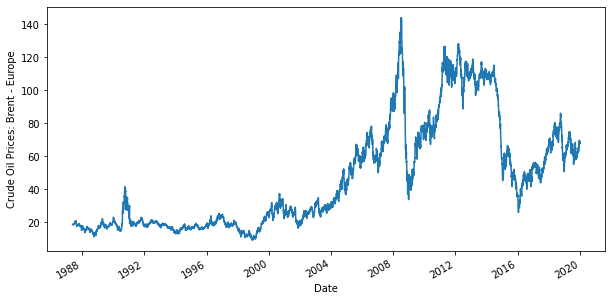

In [52]:
# Y축 이름 설정
plt.ylabel("Crude Oil Prices: Brent - Europe")

# 그래프 사이즈 설정
dataset.Oil_price.plot(figsize=(10,5))

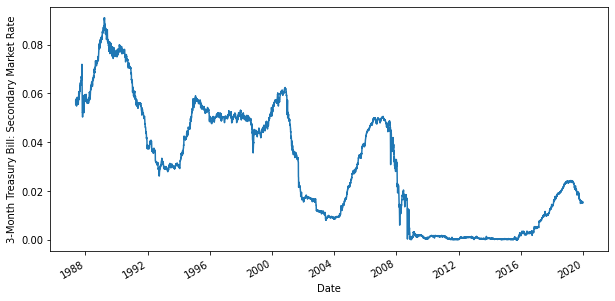

In [53]:
# Y축 이름 설정
plt.ylabel("3-Month Treasury Bill: Secondary Market Rate")

# 그래프 사이즈 설정
dataset.DTB3_rate.plot(figsize=(10,5))

## 설명변수 정의 — 오일 가격을 예측하는데 사용하는 특징들(the features) 

### 1) 과거 1일 ~ 10일의 이동평균 
### 2) 이동평균 * 3개월 Treasury Bill

In [54]:
# 설명변수 만들기
dataset['MA1'] = dataset['Oil_price'].shift(1).rolling(window=1).mean()
dataset['MA2'] = dataset['Oil_price'].shift(1).rolling(window=2).mean()
dataset['MA3'] = dataset['Oil_price'].shift(1).rolling(window=3).mean()
dataset['MA4'] = dataset['Oil_price'].shift(1).rolling(window=4).mean()
dataset['MA5'] = dataset['Oil_price'].shift(1).rolling(window=5).mean()
dataset['MA6'] = dataset['Oil_price'].shift(1).rolling(window=6).mean()
dataset['MA7'] = dataset['Oil_price'].shift(1).rolling(window=7).mean()
dataset['MA8'] = dataset['Oil_price'].shift(1).rolling(window=8).mean()
dataset['MA9'] = dataset['Oil_price'].shift(1).rolling(window=9).mean()
dataset['MA10'] = dataset['Oil_price'].shift(1).rolling(window=10).mean()
dataset['MA1_DTB3'] = dataset["MA1"]*dataset['DTB3_rate']
dataset['MA2_DTB3'] = dataset["MA2"]*dataset['DTB3_rate']
dataset['MA3_DTB3'] = dataset["MA3"]*dataset['DTB3_rate']
dataset['MA4_DTB3'] = dataset["MA4"]*dataset['DTB3_rate']
dataset['MA5_DTB3'] = dataset["MA5"]*dataset['DTB3_rate']
dataset['MA6_DTB3'] = dataset["MA6"]*dataset['DTB3_rate']
dataset['MA7_DTB3'] = dataset["MA7"]*dataset['DTB3_rate']
dataset['MA8_DTB3'] = dataset["MA8"]*dataset['DTB3_rate']
dataset['MA9_DTB3'] = dataset["MA9"]*dataset['DTB3_rate']
dataset['MA10_DTB3'] = dataset["MA10"]*dataset['DTB3_rate']

In [55]:
dataset.head()

,Oil_price,Oil_log_return,DTB3_rate,MA1,MA2,MA3,MA4,MA5,MA6,MA7,MA8,MA9,MA10,MA1_DTB3,MA2_DTB3,MA3_DTB3,MA4_DTB3,MA5_DTB3,MA6_DTB3,MA7_DTB3,MA8_DTB3,MA9_DTB3,MA10_DTB3
Date,,,,,,,,,,,,,,,,,,,,,,,
1987-05-20,18.63,NaN,0.0569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-05-21,18.45,-0.009709,0.0553,18.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.030239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-05-22,18.55,0.005405,0.0555,18.45,18.540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.023975,1.028970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-05-25,18.60,0.002692,0.0555,18.55,18.500,18.543333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.029525,1.026750,1.029155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-05-26,18.63,0.001612,0.0561,18.60,18.575,18.533333,18.5575,NaN,NaN,NaN,NaN,NaN,NaN,1.043460,1.042058,1.039720,1.041076,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# NaN 값을 제거
dataset = dataset.dropna()
dataset.head()

,Oil_price,Oil_log_return,DTB3_rate,MA1,MA2,MA3,MA4,MA5,MA6,MA7,MA8,MA9,MA10,MA1_DTB3,MA2_DTB3,MA3_DTB3,MA4_DTB3,MA5_DTB3,MA6_DTB3,MA7_DTB3,MA8_DTB3,MA9_DTB3,MA10_DTB3
Date,,,,,,,,,,,,,,,,,,,,,,,
1987-06-03,18.75,0.003740,0.0569,18.68,18.665,18.636667,18.6275,18.622,18.623333,18.620000,18.61125,18.593333,18.597,1.062892,1.062038,1.060426,1.059905,1.059592,1.059668,1.059478,1.058980,1.057961,1.058169
1987-06-04,18.78,0.001599,0.0566,18.75,18.715,18.693333,18.6650,18.652,18.643333,18.641429,18.63625,18.626667,18.609,1.061250,1.059269,1.058043,1.056439,1.055703,1.055213,1.055105,1.054812,1.054269,1.053269
1987-06-05,18.65,-0.006946,0.0568,18.78,18.765,18.736667,18.7150,18.688,18.673333,18.662857,18.65875,18.652222,18.642,1.066704,1.065852,1.064243,1.063012,1.061478,1.060645,1.060050,1.059817,1.059446,1.058866
1987-06-08,18.75,0.005348,0.0566,18.65,18.715,18.726667,18.7150,18.702,18.681667,18.670000,18.66125,18.657778,18.652,1.055590,1.059269,1.059929,1.059269,1.058533,1.057382,1.056722,1.056227,1.056030,1.055703
1987-06-09,18.78,0.001599,0.0551,18.75,18.700,18.726667,18.7325,18.722,18.710000,18.691429,18.68000,18.671111,18.667,1.033125,1.030370,1.031839,1.032161,1.031582,1.030921,1.029898,1.029268,1.028778,1.028552


In [57]:
# 샘플 데이터의 시작일과 종료일을 선택
start_date = "1987-06-03" 
end_date = "2019-12-31"

data = dataset.loc[start_date:end_date,:].copy()
data.head()

,Oil_price,Oil_log_return,DTB3_rate,MA1,MA2,MA3,MA4,MA5,MA6,MA7,MA8,MA9,MA10,MA1_DTB3,MA2_DTB3,MA3_DTB3,MA4_DTB3,MA5_DTB3,MA6_DTB3,MA7_DTB3,MA8_DTB3,MA9_DTB3,MA10_DTB3
Date,,,,,,,,,,,,,,,,,,,,,,,
1987-06-03,18.75,0.003740,0.0569,18.68,18.665,18.636667,18.6275,18.622,18.623333,18.620000,18.61125,18.593333,18.597,1.062892,1.062038,1.060426,1.059905,1.059592,1.059668,1.059478,1.058980,1.057961,1.058169
1987-06-04,18.78,0.001599,0.0566,18.75,18.715,18.693333,18.6650,18.652,18.643333,18.641429,18.63625,18.626667,18.609,1.061250,1.059269,1.058043,1.056439,1.055703,1.055213,1.055105,1.054812,1.054269,1.053269
1987-06-05,18.65,-0.006946,0.0568,18.78,18.765,18.736667,18.7150,18.688,18.673333,18.662857,18.65875,18.652222,18.642,1.066704,1.065852,1.064243,1.063012,1.061478,1.060645,1.060050,1.059817,1.059446,1.058866
1987-06-08,18.75,0.005348,0.0566,18.65,18.715,18.726667,18.7150,18.702,18.681667,18.670000,18.66125,18.657778,18.652,1.055590,1.059269,1.059929,1.059269,1.058533,1.057382,1.056722,1.056227,1.056030,1.055703
1987-06-09,18.78,0.001599,0.0551,18.75,18.700,18.726667,18.7325,18.722,18.710000,18.691429,18.68000,18.671111,18.667,1.033125,1.030370,1.031839,1.032161,1.031582,1.030921,1.029898,1.029268,1.028778,1.028552


# 실습 - feature 선택

In [58]:
data.columns

Index(['Oil_price', 'Oil_log_return', 'DTB3_rate', 'MA1', 'MA2', 'MA3', 'MA4',
       'MA5', 'MA6', 'MA7', 'MA8', 'MA9', 'MA10', 'MA1_DTB3', 'MA2_DTB3',
       'MA3_DTB3', 'MA4_DTB3', 'MA5_DTB3', 'MA6_DTB3', 'MA7_DTB3', 'MA8_DTB3',
       'MA9_DTB3', 'MA10_DTB3'],
      dtype='object')

In [59]:
# 원하는 특징 변수를 선택
features = ["MA1", "MA5", "MA10", "MA5_DTB3"]

# 선택한 특징 변수를 X로 설정
X = data[features]

# 데이터의 시작부분을 확인
X.head()

,MA1,MA5,MA10,MA5_DTB3
Date,,,,
1987-06-03,18.68,18.622,18.597,1.059592
1987-06-04,18.75,18.652,18.609,1.055703
1987-06-05,18.78,18.688,18.642,1.061478
1987-06-08,18.65,18.702,18.652,1.058533
1987-06-09,18.75,18.722,18.667,1.031582


## 종속변수 정의



In [60]:
# 원하는 종속 변수를 선택 
# "Oil_price"  : 오일의 가격
# "Oil_log_return"  : 오일의 로그 수익률
dep_var = "Oil_price"
y = data[dep_var] 

# 데이터의 시작부분을 확인
y.head()

Date
1987-06-03    18.75
1987-06-04    18.78
1987-06-05    18.65
1987-06-08    18.75
1987-06-09    18.78
Name: Oil_price, dtype: float64

## Training

### 데이터를 2가지 집단으로 나누기 
### 80% : training set
### 20% : testing set


In [61]:
# 전체 데이터의 80%를 training set으로 설정
training = 0.8
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]


![](https://github.com/data-science-lab/predicting-oil-prices/blob/main/03_Result/training_test.png?raw=true)

## 모형 선택

### 선형 회귀(Linear Regression)

In [62]:
# 회귀 분석에 대한 계수 및 상수 생성
linear_model = LinearRegression().fit(X_train,y_train)

#### Predicted Value & Actual Value 비교

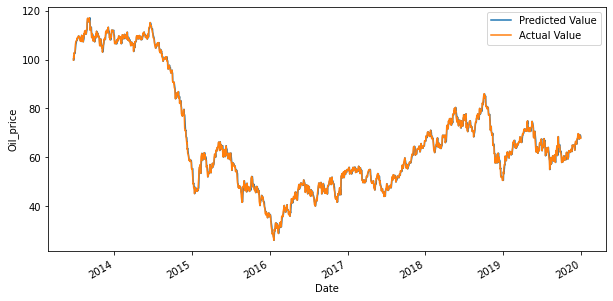

In [63]:
predicted_value = linear_model.predict(X_test)
predicted_value = pd.DataFrame(predicted_value,index=y_test.index,columns = [dep_var])
predicted_value.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Value','Actual Value'])
plt.ylabel(dep_var)
plt.show()

#### 모형 정확도(accuracy) 계산

In [64]:
R_squared_score = linear_model.score(X_test,y_test)*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 99.73% accuracy.


### 서포트 벡터 머신(Support Vector Machine)

In [65]:
svm_model = svm.SVR()
svm_model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### Predicted Value & Actual Value 비교

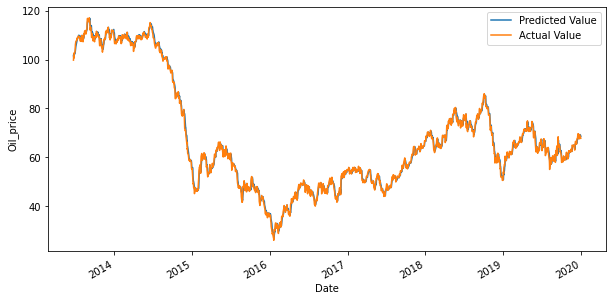

In [66]:
predicted_value = svm_model.predict(X_test)
predicted_value = pd.DataFrame(predicted_value,index=y_test.index,columns = [dep_var])
predicted_value.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Value','Actual Value'])
plt.ylabel(dep_var)
plt.show()

#### 모형 정확도(accuracy) 계산

In [67]:
R_squared_score = svm_model.score(X_test,y_test)*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 99.68% accuracy.


### 결정 트리(Decision Tree Regression)

In [68]:
# max_depth의 값이 커질수록 정확도 상승
N = 2
dtr_model = DecisionTreeRegressor(max_depth=N) 
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### Predicted Value & Actual Value 비교

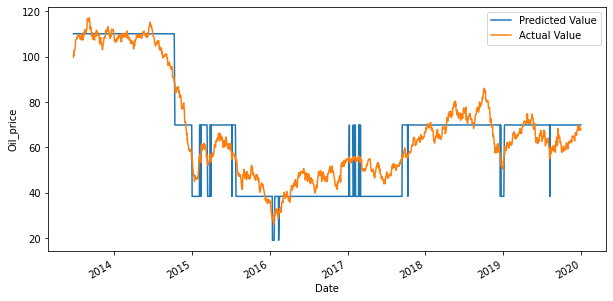

In [69]:
predicted_value = dtr_model.predict(X_test)
predicted_value = pd.DataFrame(predicted_value,index=y_test.index,columns = [dep_var])
predicted_value.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Value','Actual Value'])
plt.ylabel(dep_var)
plt.show()

#### 모형 정확도(accuracy) 계산

In [70]:
R_squared_score = dtr_model.score(X_test,y_test)*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 85.23% accuracy.


### Neural Network

In [71]:
# 뉴럴 네트워크에 들어가도록 인풋 데이터를 변형해준다.
X_train_set = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
y_train_set = np.array(y_train)
X_test_set = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

In [72]:
model = Sequential()
##model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(len(features), 1)))
##model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
history = model.fit(X_train_set,y_train_set, epochs=10, verbose = 2)
#model.summary()

Epoch 1/10
209/209 - 1s - loss: 353.4887
Epoch 2/10
209/209 - 0s - loss: 1.7222
Epoch 3/10
209/209 - 0s - loss: 1.5969
Epoch 4/10
209/209 - 0s - loss: 1.5155
Epoch 5/10
209/209 - 0s - loss: 1.4433
Epoch 6/10
209/209 - 0s - loss: 1.3535
Epoch 7/10
209/209 - 0s - loss: 1.2862
Epoch 8/10
209/209 - 0s - loss: 1.2662
Epoch 9/10
209/209 - 0s - loss: 1.2592
Epoch 10/10
209/209 - 0s - loss: 1.2639


#### Predicted Value & Actual Value 비교

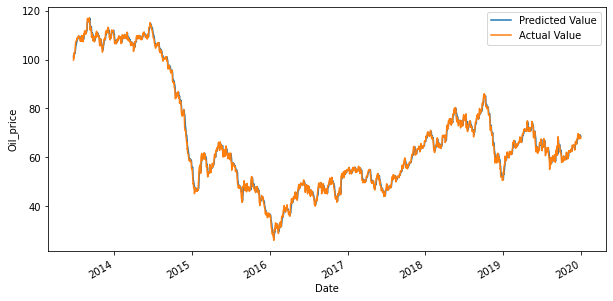

In [73]:
predicted_value = model.predict(X_test_set,verbose=0)
predicted_value = pd.DataFrame(predicted_value,index=y_test.index,columns = [dep_var])
predicted_value.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Value','Actual Value'])
plt.ylabel(dep_var)
plt.show()

#### 모형 정확도(accuracy) 계산

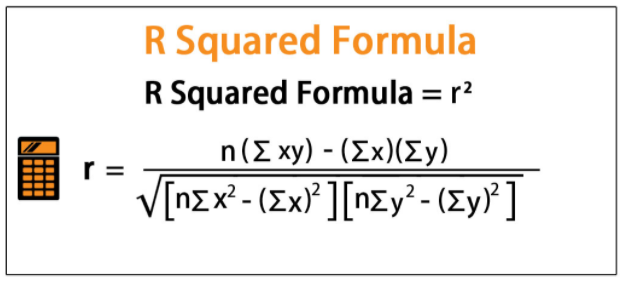

In [74]:
x = np.array(predicted_value).reshape(1, len(predicted_value))
Y = np.array(y_test)
r = np.corrcoef(x, Y)[0,1]

R_squared_score = r**2

accuracy = ("{0:.2f}".format(R_squared_score*100))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 99.69% accuracy.


## 모델 개선

### 1. Making our dataset larger : 데이터의 시작일이나 종료일을 변경
### 2. 독립변수 변경
### 3. 모형 변경

In [75]:
# 샘플 데이터의 시작일과 종료일을 선택
start_date = "2000-01-01" 
end_date = "2019-12-31"

data = dataset.loc[start_date:end_date,:].copy()

# 원하는 특징 변수를 선택
features = ["MA1", "MA2", "MA3", "MA1_DTB3", "MA2_DTB3"]
# 선택한 특징 변수를 X로 설정  
X = data[features]

# 원하는 종속 변수를 선택 
# "Oil_price"   :   오일의 가격
# "Oil_log_return"   :   오일의 로그 수익률
y = data["Oil_log_return"] 

In [76]:
# 전체 데이터의 80%를 training set으로 설정
training = 0.8
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

##### 선형 회귀(Linear Regression)

In [77]:
# 회귀 분석에 대한 계수 및 상수 생성
linear_model = LinearRegression().fit(X_train,y_train)

# 모형 정확도 계산
R_squared_score = linear_model.score(X_test,y_test)*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a -0.11% accuracy.


##### 서포트 벡터 머신(Support Vector Machine)

In [78]:
# 서포트 벡터 머신
svm_model = svm.SVR()
svm_model.fit(X_train, y_train)

# 모형 정확도 계산
R_squared_score = svm_model.score(X_test,y_test)*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a -12.13% accuracy.


##### 결정 트리 모형(Decision Tree Regression)

In [79]:
# 결정 트리 모형
# max_depth의 값이 커질수록 정확도 상승
N = 10
dtr_model = DecisionTreeRegressor(max_depth=N) 
dtr_model.fit(X_train, y_train)

# 모형 정확도 계산
R_squared_score = dtr_model.score(X_test,y_test)*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a -0.03% accuracy.


##### Neural Network

In [80]:
# 뉴럴 네트워크에 들어가도록 인풋 데이터를 변형해준다.
X_train_set = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
y_train_set = np.array(y_train)
X_test_set = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
#model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(len(features), 1)))
#model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
history = model.fit(X_train_set,y_train_set, epochs=50, verbose=False)
predicted_value = model.predict(X_test_set,verbose=0)

# 모형 정확도 계산
x = np.array(predicted_value).reshape(1, len(predicted_value))
Y = np.array(y_test)
r = np.corrcoef(x, Y)[0,1]

R_squared_score = r**2

accuracy = ("{0:.2f}".format(R_squared_score*100))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 0.00% accuracy.
